In [4]:
#iris dataset
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
iris_data = sns.load_dataset('iris')

print(iris_data[['species']])
print(iris_data.shape)


       species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]
(150, 5)


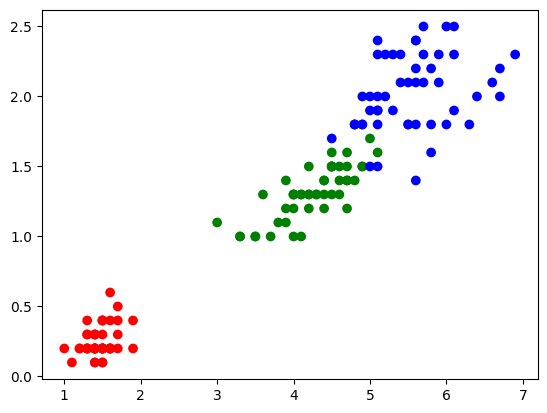

In [5]:
#実際の分布
iris_data['species'] = iris_data['species'].replace({'setosa':0,'versicolor':1,'virginica':2}).astype(int)
rgb = np.array(['r','g','b'])
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],color=rgb[iris_data['species']])
plt.show()

In [6]:
#speciesをdrop
iris_data = iris_data.drop('species',axis=1)
#欠損地確認
print(iris_data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

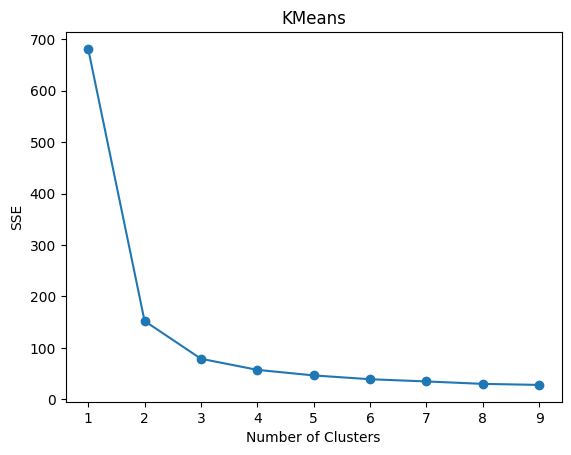

In [7]:
#エルボー法でクラスター数推定
K_list = range(1,10)
sse=[]
for k in K_list:
  model = KMeans(n_clusters=k)
  pred = model.fit(iris_data)
  sse.append(model.inertia_)
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(K_list, sse)
plt.scatter(K_list, sse)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


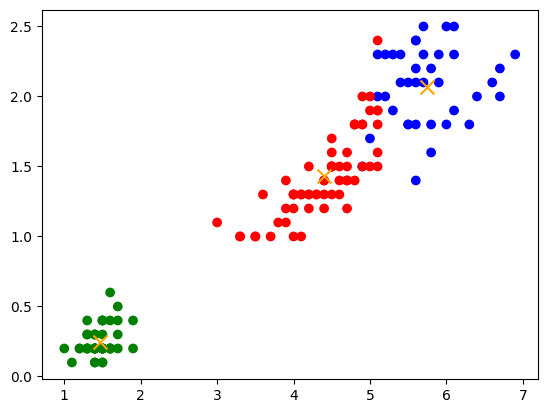

In [22]:
#K=3
model_k3 = KMeans(n_clusters=3)
pred = model_k3.fit(iris_data)
print(model_k3.labels_)
rgb = np.array(['r','g','b'])
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],color=rgb[model_k3.labels_])
plt.scatter(model_k3.cluster_centers_[:,2],model_k3.cluster_centers_[:,3],s=100,marker='x',color='orange')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 1 1 1 1 2 1 1 1 3
 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3 1 1 1 3 3
 1 3]


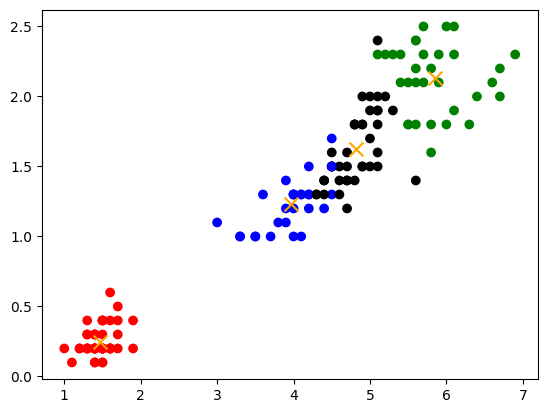

In [21]:
#K=4
model_k4 = KMeans(n_clusters=4)
pred = model_k4.fit(iris_data)
print(model_k4.labels_)
rgb = np.array(['r','g','b','black'])
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],color=rgb[model_k4.labels_])
plt.scatter(model_k4.cluster_centers_[:,2],model_k4.cluster_centers_[:,3],s=100,marker='x',color='orange')
plt.show()